# loading the libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [17]:
df = pd.read_csv("hotel_booking.csv")

In [18]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [19]:
df.shape

(119390, 36)

In [20]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [21]:
df.drop(['name','email','phone-number','credit_card'],axis=1,inplace = True)

In [22]:
df.shape

(119390, 32)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [24]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [26]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [27]:
for col in df.describe(include='object'):
    print(col)
    print(df[col].unique())
    print('_'*50)

hotel
['Resort Hotel' 'City Hotel']
__________________________________________________
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
__________________________________________________
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
__________________________________________________
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [28]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [29]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


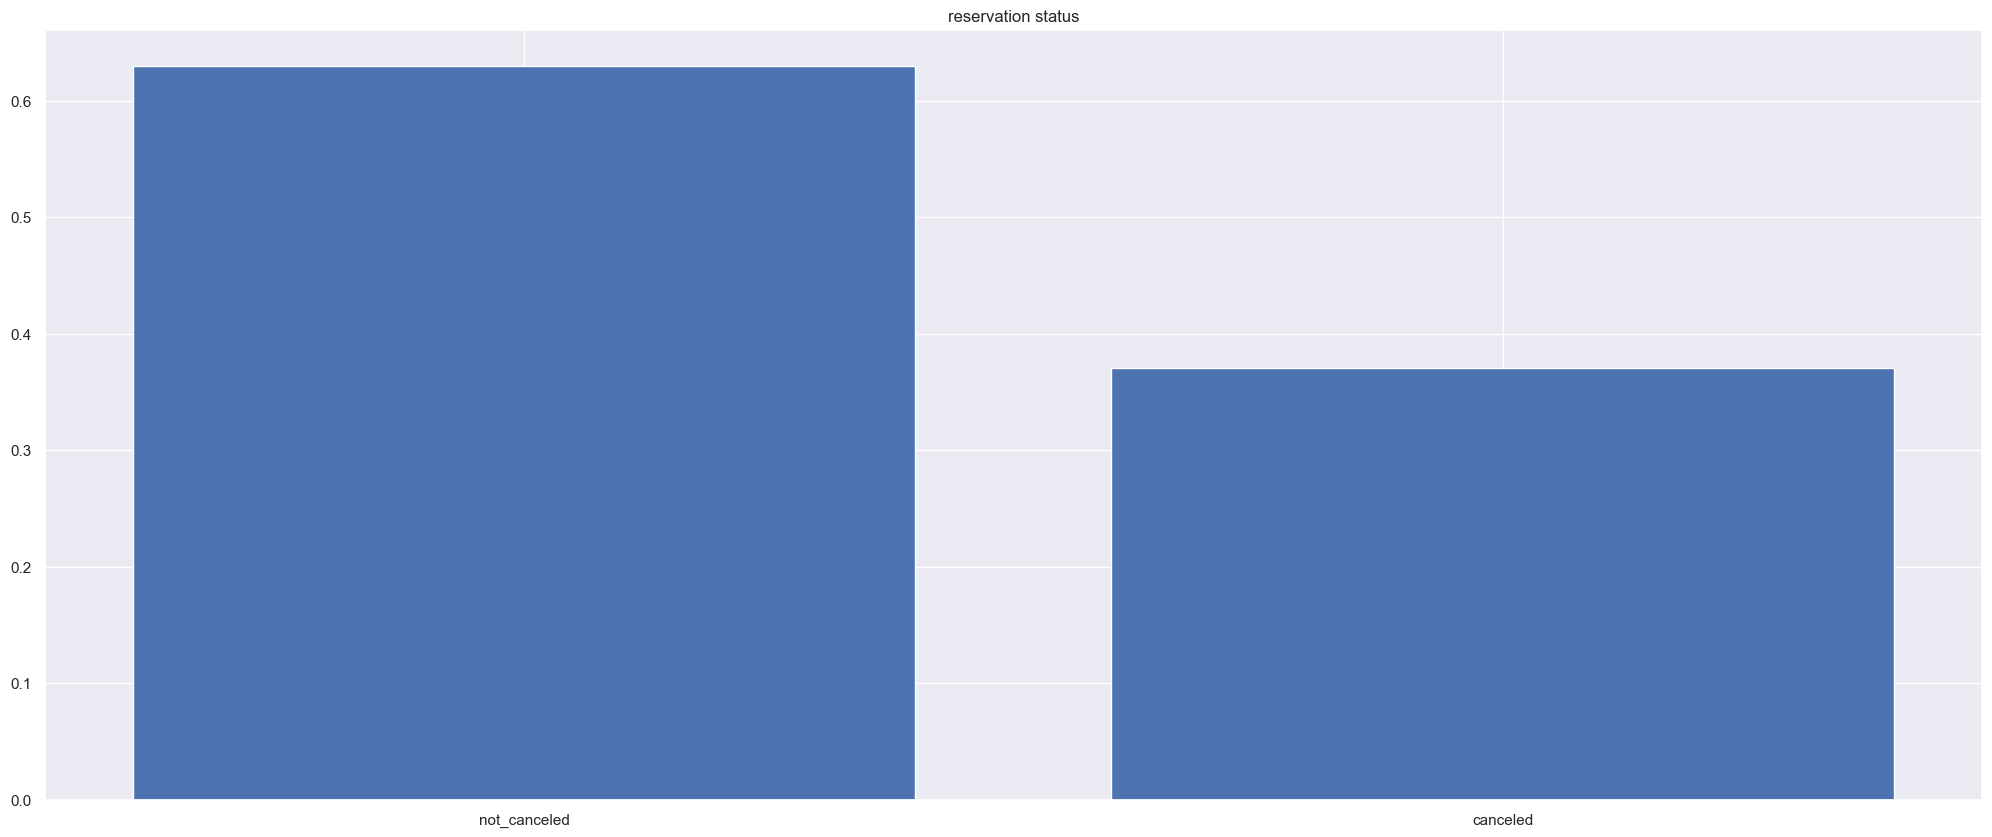

<Figure size 2500x1000 with 0 Axes>

In [259]:
is_cancel = df['is_canceled'].value_counts(normalize=True)
is_cancel
plt.title('reservation status')
plt.bar(['not_canceled','canceled'],is_cancel)
plt.show()
plt.savefig('reservation_status.png',bbox_inches = 'tight')




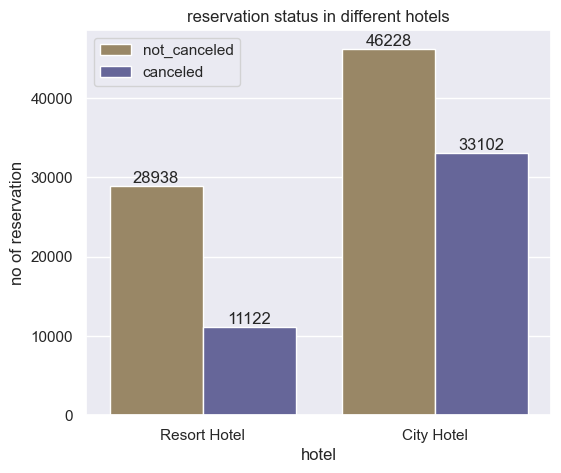

In [253]:
sns.set(rc ={'figure.figsize':(6,5)})
ax = sns.countplot(x ='hotel', hue= 'is_canceled', data = df, palette = ['orange','blue'], saturation = .2)

for bar in ax.containers:
    ax.bar_label(bar)

plt.title('reservation status in different hotels')

plt.ylabel('no of reservation')
plt.legend(['not_canceled','canceled'],loc = 'best')
plt.savefig('reservation status in different hotels.png',bbox_inches = 'tight')

In [241]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [86]:
city_hotel = df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True

is_canceled
0    0.58273
1    0.41727
Name: proportion, dtype: float64

In [132]:
resort = resort_hotel.groupby('reservation_status_date')[['adr']].mean()

city = city_hotel.groupby('reservation_status_date')[['adr']].mean()


,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


In [113]:
# this gives us the same result as the upper row give us the result

# resort_hotel.groupby(['reservation_status_date'],as_index = False)['adr'].mean().sort_values(by='reservation_status_date',ascending = False)

,reservation_status_date,adr
912,2017-09-14,105.930000
911,2017-09-12,153.570000
910,2017-09-10,145.272500
909,2017-09-09,147.778333
908,2017-09-08,101.012500
...,...,...
4,2015-01-21,37.301209
3,2015-01-18,0.000000
2,2015-01-02,9.633750
1,2015-01-01,61.966667


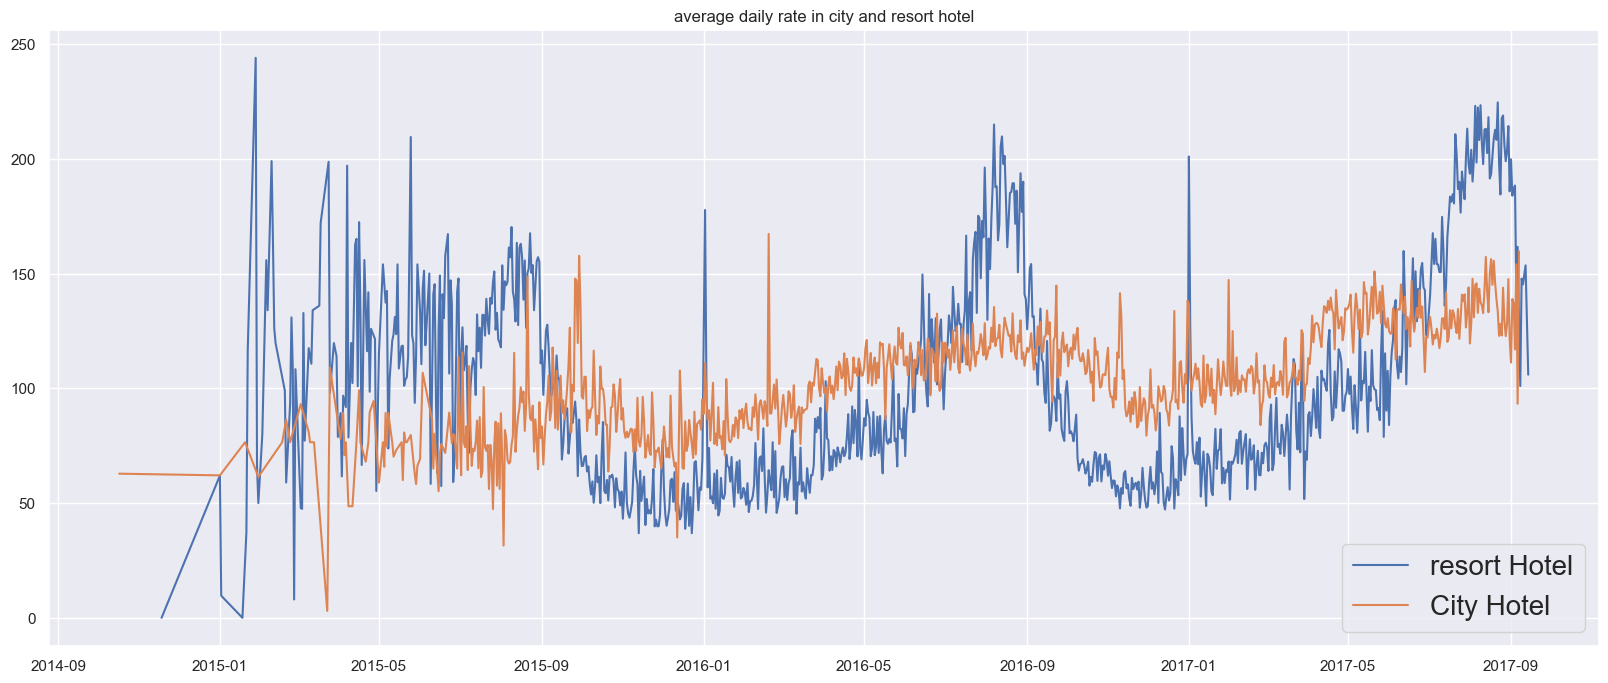

<Figure size 2000x800 with 0 Axes>

In [266]:
sns.set(rc={'figure.figsize':(20,8)})

plt.title('average daily rate in city and resort hotel')
plt.plot(resort.index, resort['adr'], label = 'resort Hotel')
plt.plot(city.index, city['adr'], label = 'City Hotel')
plt.legend(fontsize=20,loc='best')
plt.show()

plt.savefig('monthwiseate.png',bbox_inches='tight')

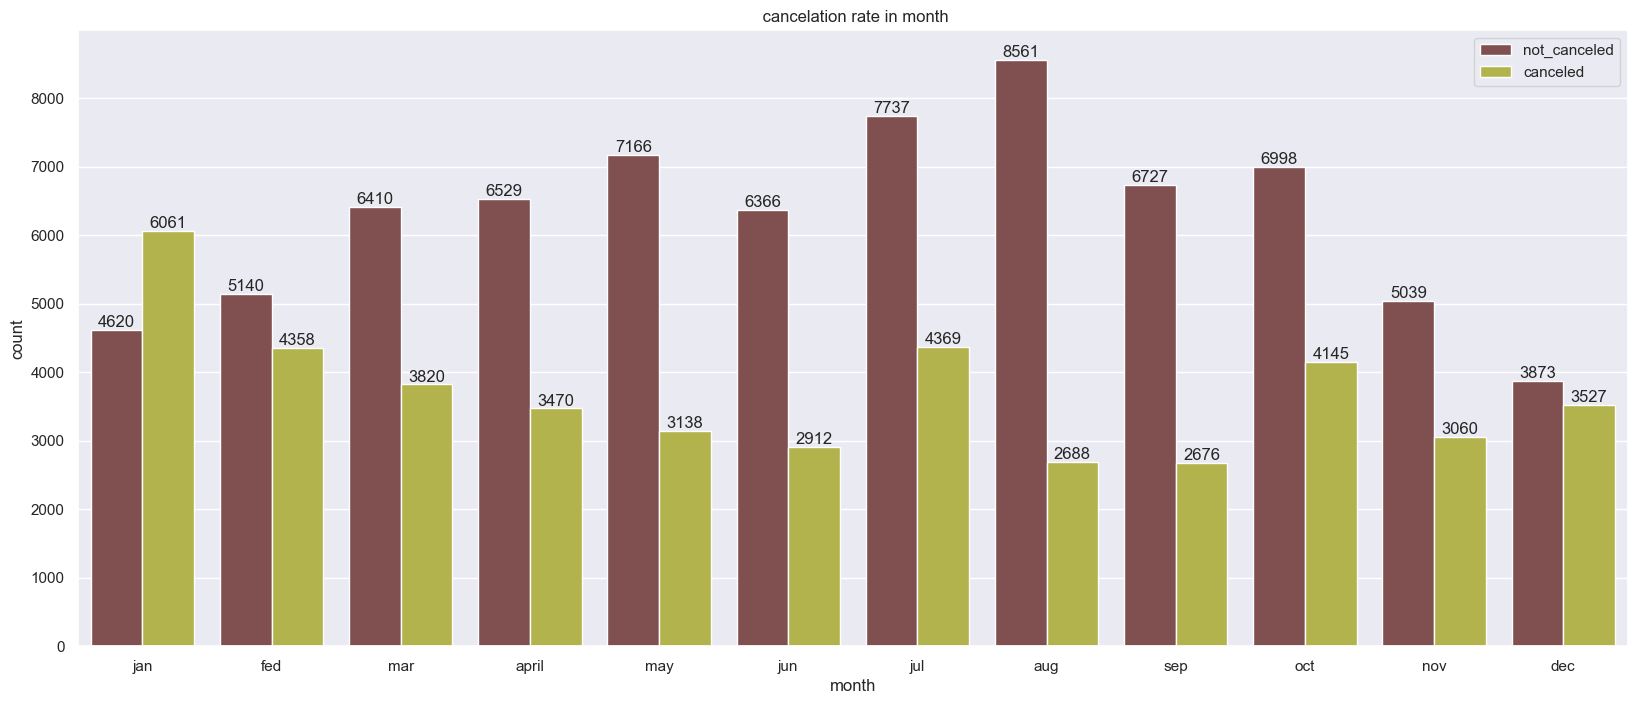

In [263]:
df['month'] = df['reservation_status_date'].dt.month

plt.title(' cancelation rate in month')

ax = sns.countplot(x='month',hue= 'is_canceled',data = df, palette=['brown','yellow'], saturation =.4)

for bar in ax.containers:
    ax.bar_label(bar)

plt.legend(['not_canceled','canceled'])

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['jan','fed','mar','april','may','jun','jul','aug','sep','oct','nov','dec'])

plt.savefig('monthwise cancelation rate.png',bbox_inches='tight')

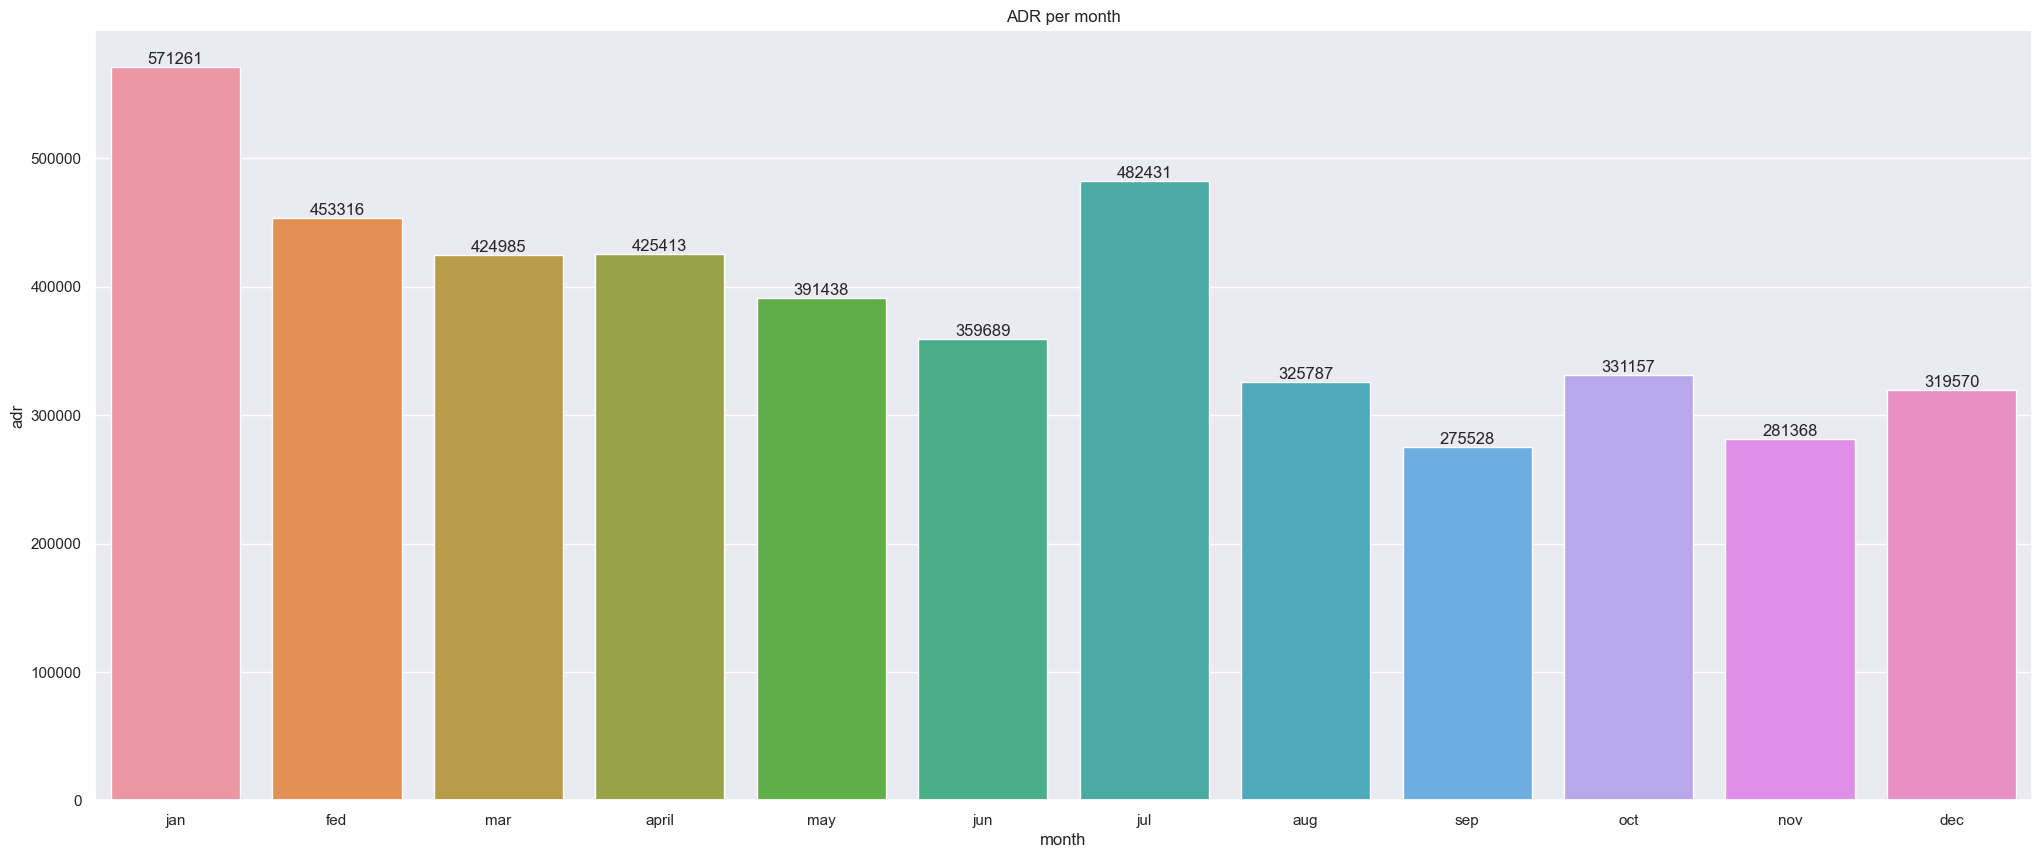

In [264]:
sns.set(rc={'figure.figsize':(25,10)})

xa = sns.barplot(x='month',y='adr',data = df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.title('ADR per month')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['jan','fed','mar','april','may','jun','jul','aug','sep','oct','nov','dec'])
for bar in xa.containers:
    xa.bar_label(bar)

plt.savefig('adr per month.png',bbox_inches='tight')

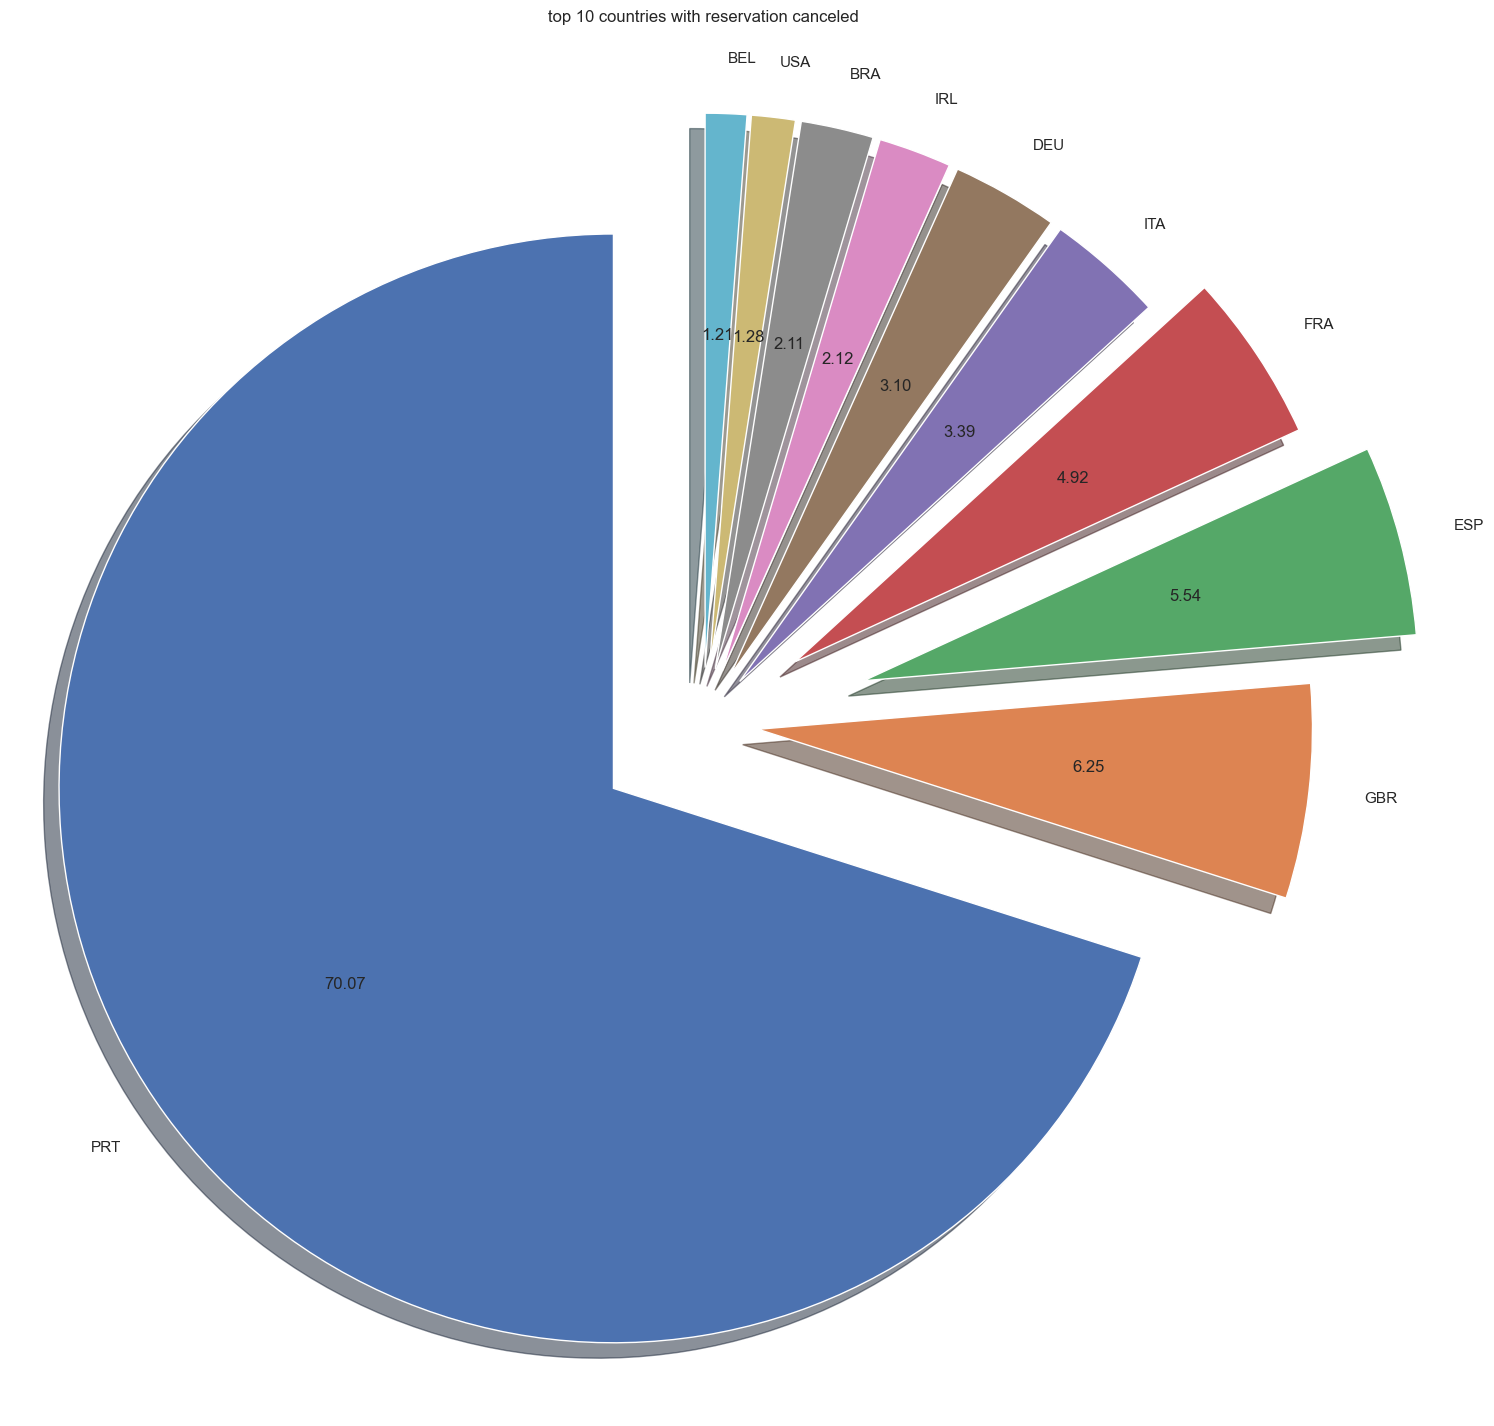

In [257]:
dat = df[df['is_canceled']==1]['country'].value_counts().head(10)

plt.figure(figsize=(20,18))
plt.title('top 10 countries with reservation canceled')

plt.pie(x=dat,autopct='%.2f', shadow=True,explode = [.2,.1,.3,.2,0.1,0.1,0.1,0.1,0.1,0.1],startangle=90,labels =dat.index)

plt.savefig('coutries r cahnceh.png',bbox_inches='tight')